In [1]:
import pandas as pd
import seaborn as sns
import re
from scipy.stats import ttest_ind, chisquare, mannwhitneyu, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("gamedata.csv")

In [3]:
data.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


## Monthly watch hours on Twitch over the years

In [4]:
data['Hours_Sum'] = data.groupby(['Year'])['Hours_watched']. \
    transform(func='sum')

data

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Hours_Sum
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,5082766384
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,5082766384
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26,5082766384
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29,5082766384
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,5082766384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13795,196,DEVOUR,9,2021,723182,29526 hours,56083,345,11026,1005,41,24.49,16944934163
13796,197,War Thunder,9,2021,723003,75333 hours,8659,225,6892,1005,104,9.60,16944934163
13797,198,Lost in Random,9,2021,720893,12763 hours,53975,107,1649,1002,17,56.48,16944934163
13798,199,Garry's Mod,9,2021,712712,17637 hours,88018,80,3711,991,24,40.41,16944934163


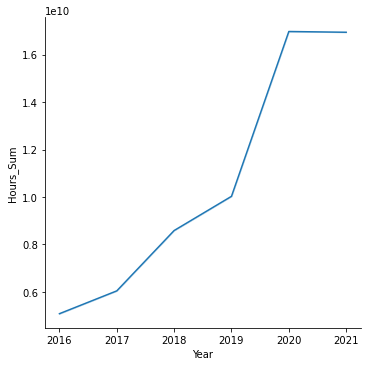

In [5]:
sns.relplot(data=data, kind='line', x='Year', y='Hours_Sum')

## Correlation between values 

In [6]:
data.corr()[['Hours_watched']].sort_values(by='Hours_watched', ascending=False)

,Hours_watched
Hours_watched,1.000000
Avg_viewers,0.999603
Avg_channels,0.761911
Streamers,0.755022
Peak_viewers,0.724521
Peak_channels,0.528015
Hours_Sum,0.146970
Year,0.144386
Month,-0.005280
Avg_viewer_ratio,-0.018365


<AxesSubplot:>

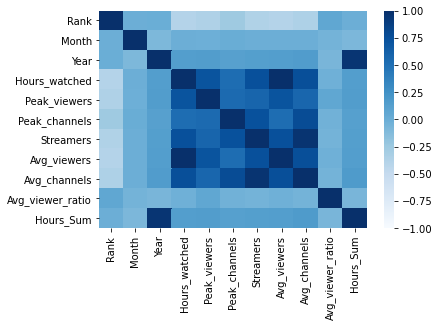

In [7]:
sns.heatmap(data=data.corr(), cmap='Blues', vmin=-1.0, vmax=1.0)

## Is there a linear correlation between hours streamed and hours watched

In [8]:
#int extraction from strings 
data['Hours_Streamed'] = data['Hours_Streamed'].str.extract('(\d+)').astype(int)

In [9]:
ttest_ind(data['Hours_watched'].dropna(), data['Hours_Streamed'].dropna())

Ttest_indResult(statistic=32.2877531954556, pvalue=1.5690945976825307e-224)

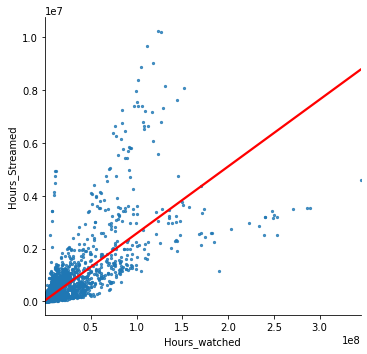

In [10]:
sns.lmplot(data=data, x='Hours_watched', y='Hours_Streamed', ci=None, scatter_kws={'s':5}, line_kws={'color':'red'})

In [11]:
estimate = sm.OLS(data['Hours_Streamed'], sm.add_constant(data['Hours_watched']))
estimate = estimate.fit()
estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Hours_Streamed   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                 1.911e+04
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:20:05   Log-Likelihood:            -1.9574e+05
No. Observations:               13800   AIC:                         3.915e+05
Df Residuals:                   13798   BIC:                         3.915e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.546e+04   3096.947     11.450      0.000    2.94e+04    4.15e+04
Hours_watched     0.0254      0.000    138.222      0.000       0.025       0.026
==============================================================================
Omnibus:                    18454.926   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9534202.426
Skew:                           7.288   Prob(JB):                         0.00
Kurtosis:                     130.940   Cond. No.                     1.75e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Is there a relationship between Streamers and Peak_viewers

In [12]:
ttest_ind(data['Avg_viewers'].dropna(), data['Hours_watched'].dropna())

Ttest_indResult(statistic=-33.364679281481386, pvalue=2.5474686556322804e-239)

In [13]:
estimate = sm.OLS(data['Avg_viewers'], sm.add_constant(data['Hours_watched']))
estimate = estimate.fit()
estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Avg_viewers   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.736e+07
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:20:06   Log-Likelihood:            -1.0847e+05
No. Observations:               13800   AIC:                         2.169e+05
Df Residuals:                   13798   BIC:                         2.170e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1362      5.550     -0.025      0.980     -11.014      10.742
Hours_watched     0.0014   3.29e-07   4166.984      0.000       0.001       0.001
==============================================================================
Omnibus:                    25995.446   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        138109468.265
Skew:                          13.913   Prob(JB):                         0.00
Kurtosis:                     492.302   Cond. No.                     1.75e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

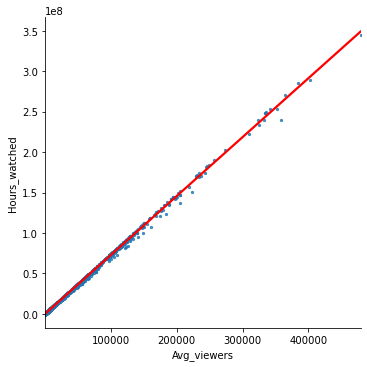

In [14]:
sns.lmplot(data=data, x='Avg_viewers', y='Hours_watched', ci=None, scatter_kws={'s':5}, line_kws={'color':'red'})

## Most popular games over the years

In [15]:
data.reset_index()

,index,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Hours_Sum
0,0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29,5082766384
1,1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62,5082766384
2,2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26,5082766384
3,3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29,5082766384
4,4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03,5082766384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13795,13795,196,DEVOUR,9,2021,723182,29526,56083,345,11026,1005,41,24.49,16944934163
13796,13796,197,War Thunder,9,2021,723003,75333,8659,225,6892,1005,104,9.60,16944934163
13797,13797,198,Lost in Random,9,2021,720893,12763,53975,107,1649,1002,17,56.48,16944934163
13798,13798,199,Garry's Mod,9,2021,712712,17637,88018,80,3711,991,24,40.41,16944934163


In [16]:
data_tops = data.query('Rank < 50')

In [17]:
top_games = ["Counter-Strike: Global Offensive", "Dota 2", "Grand Theft Auto V", "Hearthstone", "League of Legends"]
data_tops = data[data.Game.isin(top_games)]

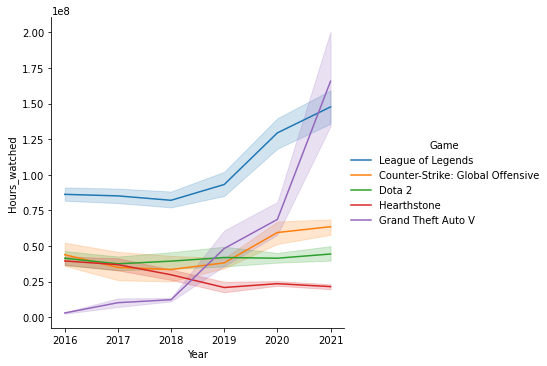

In [21]:

sns.relplot(data=data_tops, kind='line', x='Year', y='Hours_watched', hue='Game')